# Lab01: Linear Regression

## 1 - Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
%matplotlib inline

## 2 - Problem Statement

Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet.

- You would like to expand your business to cities that may give your restaurant higher profits.
- The chain already has restaurants in various cities and you have data for profits and populations from the cities.
- You also have data on cities that are candidates for a new restaurant.
  - For these cities, you have the city population.

Can you use the data to help you identify which cities may potentially give your business higher profits?

## 3 - Dataset

You will start by loading the dataset for this task.

- The `load_data()` function shown below loads the data into variables `x_train` and `y_train` .
  - `x_train` is the population of a city.
  - `y_train` is the profit of a restaurant in that city. A negative value for profit indicates a loss.
  - Both `x_train` and `y_train` are numpy arrays.

In [2]:
# Load the dataset

def load_data():
    data = np.loadtxt('data.txt', delimiter=',')
    x = data[:, 0]
    y = data[:, 1]
    return x, y


x_train, y_train = load_data()

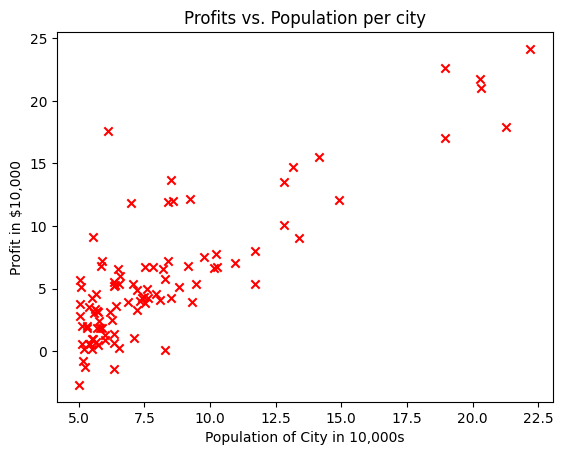

In [3]:
# Visualize the data

plt.scatter(x_train, y_train, marker='x', c='r')
plt.title('Profits vs. Population per city')
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')
plt.show()

## 4 - Cost Function

In [4]:
def compute_cost(x, y, w, b):
    """
    Computes the cost function for linear regression.

    Args:
        x (ndarray): Shape (m,) Input to the model (population of cities)
        y (ndarray): Shape (m,) Label (actual profits for the cities)
        w, b (scalar): Parameters of the model

    Returns:
        total_cost (float): The cost of using w,b as the parameters for linear regression to fit the data points in x and y
    """

    m = x.shape[0]

    total_cost = 0

    for i in range(m):
        total_cost += (w * x[i] + b - y[i]) ** 2

    total_cost /= (2 * m)

    return total_cost

## 5 - Gradient Descent

In [5]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression.

    Args:
        x (ndarray): Shape (m,) Input to the model (population of cities)
        y (ndarray): Shape (m,) Label (actual profits for the cities)
        w, b (scalar): Parameters of the model

    Returns:
        dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
        dj_db (scalar): The gradient of the cost w.r.t. the parameter b
    """

    m = x.shape[0]

    dj_dw = 0
    dj_db = 0

    for i in range(m):
        tmp = (w * x[i] + b - y[i])
        dj_dw += tmp * x[i]
        dj_db += tmp

    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db

## 6 - Learning Parameters Using Gradient Descent

In [6]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking num_iters gradient steps with learning rate alpha.

    Args:
        x (ndarray): Shape (m,)
        y (ndarray): Shape (m,)
        w_in, b_in (scalar): Initial values of parameters of the model
        cost_function: Function to compute cost
        gradient_function: Function to compute the gradient
        alpha (float): Learning rate
        num_iters (int): Number of iterations to run gradient descent

    Returns:
        w (ndarray): Shape (1,) Updated values of parameters of the model after running gradient descent
        b (scalar): Updated value of parameter of the model after running gradient descent
    """

    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  # Avoid modifying global w within function
    b = b_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b)

        # Update parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i < 100000:  # Prevent resource exhaustion
            cost = cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iters / 10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}")

    return w, b, J_history, w_history

In [7]:
# Initialize fitting parameters
initial_w = 0.
initial_b = 0.

# Some gradient descent settings
iterations = 1500
alpha = 0.01

w, b, _, _ = gradient_descent(x_train, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)
print('w,b found by gradient descent:', w, b)

Iteration    0: Cost     6.74
Iteration  150: Cost     5.31
Iteration  300: Cost     4.96
Iteration  450: Cost     4.76
Iteration  600: Cost     4.64
Iteration  750: Cost     4.57
Iteration  900: Cost     4.53
Iteration 1050: Cost     4.51
Iteration 1200: Cost     4.50
Iteration 1350: Cost     4.49
w,b found by gradient descent: 1.166362350335582 -3.63029143940436


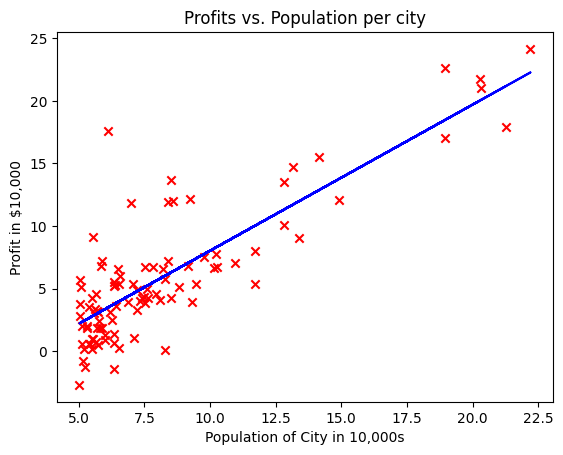

In [8]:
# Plot the linear fit

m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

plt.plot(x_train, predicted, c='b')
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title('Profits vs. Population per city')
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')
plt.show()